## Import Libraries:

In [33]:
import pandas as pd
import os
import logging
import matplotlib.pyplot as plt
import matplotlib

In [34]:
print(f"Pandas version: {pd.__version__}")
print(f"Matplotlib version: {matplotlib.__version__}")

Pandas version: 2.2.3
Matplotlib version: 3.9.2


## Config:

In [36]:
pd.options.mode.copy_on_write = True

## Preprocess Data:

In [37]:
JESTER_DATASET_DIR_PATH = os.path.join("..", "datasets")
TRAIN_INFO_PATH = os.path.join(JESTER_DATASET_DIR_PATH, "info", "jester-v1-train.csv")
VAL_INFO_PATH = os.path.join(JESTER_DATASET_DIR_PATH, "info", "jester-v1-validation.csv")
TEST_INFO_PATH = os.path.join(JESTER_DATASET_DIR_PATH, "info", "jester-v1-test.csv")
VIDEO_DIR_PATH = os.path.join(JESTER_DATASET_DIR_PATH, "jester_Dataset")
column_names = ["video_id", "label"]
train_df = pd.read_csv(TRAIN_INFO_PATH, names=column_names, header=None, delimiter=";")
val_df = pd.read_csv(VAL_INFO_PATH, names=column_names, header=None, delimiter=";")
test_df = pd.read_csv(TEST_INFO_PATH, names=column_names, header=None, delimiter=";")

In [38]:
train_df

,video_id,label
0,34870,Drumming Fingers
1,56557,Sliding Two Fingers Right
2,129112,Sliding Two Fingers Down
3,63861,Pulling Two Fingers In
4,131717,Sliding Two Fingers Up
...,...,...
118557,75507,Swiping Down
118558,48433,Sliding Two Fingers Left
118559,146421,Sliding Two Fingers Right
118560,49514,Thumb Up


In [39]:
val_df

,video_id,label
0,9223,Thumb Up
1,107090,Pushing Two Fingers Away
2,42920,Swiping Left
3,106485,Thumb Down
4,142201,Rolling Hand Backward
...,...,...
14782,97044,Drumming Fingers
14783,136208,Sliding Two Fingers Right
14784,12180,Rolling Hand Backward
14785,119381,Thumb Down


In [40]:
test_df

,,video_id,label
109621,9.0,NaN,NaN
145149,26.0,NaN,NaN
53606,15.0,NaN,NaN
1417,0.0,NaN,NaN
136684,23.0,NaN,NaN
...,...,...,...
143716,NaN,NaN,NaN
102605,NaN,NaN,NaN
36448,NaN,NaN,NaN
125031,NaN,NaN,NaN


#### Amount of probes:

In [41]:
len(train_df) + len(val_df) + len(test_df)

148092

#### Jester Dataset Classes:

In [42]:
jester_labels = {}
with open(os.path.join(JESTER_DATASET_DIR_PATH, "info", 'jester-v1-labels.csv')) as f:
    for idx2, line in enumerate(f):
        jester_labels[line.strip()] = idx2

In [43]:
jester_labels

{'Swiping Left': 0,
 'Swiping Right': 1,
 'Swiping Down': 2,
 'Swiping Up': 3,
 'Pushing Hand Away': 4,
 'Pulling Hand In': 5,
 'Sliding Two Fingers Left': 6,
 'Sliding Two Fingers Right': 7,
 'Sliding Two Fingers Down': 8,
 'Sliding Two Fingers Up': 9,
 'Pushing Two Fingers Away': 10,
 'Pulling Two Fingers In': 11,
 'Rolling Hand Forward': 12,
 'Rolling Hand Backward': 13,
 'Turning Hand Clockwise': 14,
 'Turning Hand Counterclockwise': 15,
 'Zooming In With Full Hand': 16,
 'Zooming Out With Full Hand': 17,
 'Zooming In With Two Fingers': 18,
 'Zooming Out With Two Fingers': 19,
 'Thumb Up': 20,
 'Thumb Down': 21,
 'Shaking Hand': 22,
 'Stop Sign': 23,
 'Drumming Fingers': 24,
 'No gesture': 25,
 'Doing other things': 26}

#### Apply label id to probes:

In [44]:
train_df["label_id"] = train_df["label"].apply(lambda label: jester_labels.get(label))
val_df["label_id"] = val_df["label"].apply(lambda label: jester_labels.get(label))

In [45]:
train_df

,video_id,label,label_id
0,34870,Drumming Fingers,24
1,56557,Sliding Two Fingers Right,7
2,129112,Sliding Two Fingers Down,8
3,63861,Pulling Two Fingers In,11
4,131717,Sliding Two Fingers Up,9
...,...,...,...
118557,75507,Swiping Down,2
118558,48433,Sliding Two Fingers Left,6
118559,146421,Sliding Two Fingers Right,7
118560,49514,Thumb Up,20


In [46]:
val_df

,video_id,label,label_id
0,9223,Thumb Up,20
1,107090,Pushing Two Fingers Away,10
2,42920,Swiping Left,0
3,106485,Thumb Down,21
4,142201,Rolling Hand Backward,13
...,...,...,...
14782,97044,Drumming Fingers,24
14783,136208,Sliding Two Fingers Right,7
14784,12180,Rolling Hand Backward,13
14785,119381,Thumb Down,21


#### Apply Images Directory Path To Probes:

In [47]:
def create_path(main_path: str, dir_name: str) -> str:
    return os.path.join(main_path, dir_name)

In [48]:
def get_directory_path(catalog_id, main_directory, batch_size):
    batch_num = (catalog_id - 1) // batch_size + 1
    batch_dir = f"kat{batch_num}"
    directory_path = os.path.join(main_directory, batch_dir, str(catalog_id))
    return directory_path

In [49]:
train_df["path"] = train_df["video_id"].apply(lambda video_id: get_directory_path(main_directory=VIDEO_DIR_PATH, catalog_id=video_id, batch_size=9000))
val_df["path"] = val_df["video_id"].apply(lambda video_id: get_directory_path(main_directory=VIDEO_DIR_PATH, catalog_id=video_id, batch_size=9000))
test_df["path"] = test_df["video_id"].apply(lambda video_id: get_directory_path(main_directory=VIDEO_DIR_PATH, catalog_id=video_id, batch_size=9000))

In [50]:
train_df

,video_id,label,label_id,path
0,34870,Drumming Fingers,24,../datasets/jester_Dataset/kat4/34870
1,56557,Sliding Two Fingers Right,7,../datasets/jester_Dataset/kat7/56557
2,129112,Sliding Two Fingers Down,8,../datasets/jester_Dataset/kat15/129112
3,63861,Pulling Two Fingers In,11,../datasets/jester_Dataset/kat8/63861
4,131717,Sliding Two Fingers Up,9,../datasets/jester_Dataset/kat15/131717
...,...,...,...,...
118557,75507,Swiping Down,2,../datasets/jester_Dataset/kat9/75507
118558,48433,Sliding Two Fingers Left,6,../datasets/jester_Dataset/kat6/48433
118559,146421,Sliding Two Fingers Right,7,../datasets/jester_Dataset/kat17/146421
118560,49514,Thumb Up,20,../datasets/jester_Dataset/kat6/49514


In [51]:
val_df

,video_id,label,label_id,path
0,9223,Thumb Up,20,../datasets/jester_Dataset/kat2/9223
1,107090,Pushing Two Fingers Away,10,../datasets/jester_Dataset/kat12/107090
2,42920,Swiping Left,0,../datasets/jester_Dataset/kat5/42920
3,106485,Thumb Down,21,../datasets/jester_Dataset/kat12/106485
4,142201,Rolling Hand Backward,13,../datasets/jester_Dataset/kat16/142201
...,...,...,...,...
14782,97044,Drumming Fingers,24,../datasets/jester_Dataset/kat11/97044
14783,136208,Sliding Two Fingers Right,7,../datasets/jester_Dataset/kat16/136208
14784,12180,Rolling Hand Backward,13,../datasets/jester_Dataset/kat2/12180
14785,119381,Thumb Down,21,../datasets/jester_Dataset/kat14/119381


In [52]:
test_df

,,video_id,label,path
109621,9.0,NaN,NaN,../datasets/jester_Dataset/katnan/nan
145149,26.0,NaN,NaN,../datasets/jester_Dataset/katnan/nan
53606,15.0,NaN,NaN,../datasets/jester_Dataset/katnan/nan
1417,0.0,NaN,NaN,../datasets/jester_Dataset/katnan/nan
136684,23.0,NaN,NaN,../datasets/jester_Dataset/katnan/nan
...,...,...,...,...
143716,NaN,NaN,NaN,../datasets/jester_Dataset/katnan/nan
102605,NaN,NaN,NaN,../datasets/jester_Dataset/katnan/nan
36448,NaN,NaN,NaN,../datasets/jester_Dataset/katnan/nan
125031,NaN,NaN,NaN,../datasets/jester_Dataset/katnan/nan


#### Turning Labels Dict Into DataFrame:

In [53]:
mapped_labels = train_df[["label", "label_id"]].drop_duplicates().sort_values(by=["label_id"])

In [54]:
mapped_labels

,label,label_id
33,Swiping Left,0
8,Swiping Right,1
12,Swiping Down,2
110,Swiping Up,3
17,Pushing Hand Away,4
6,Pulling Hand In,5
36,Sliding Two Fingers Left,6
1,Sliding Two Fingers Right,7
2,Sliding Two Fingers Down,8
4,Sliding Two Fingers Up,9


#### Get Sequence length:

In [55]:
def get_sequence_len(path: str) -> int:
    return len([file for file in os.listdir(path) if file.endswith(".jpg")])

In [56]:
train_df["seq_len"] = train_df["path"].apply(lambda path: get_sequence_len(path))
val_df["seq_len"] = val_df["path"].apply(lambda path: get_sequence_len(path))

In [57]:
train_df

,video_id,label,label_id,path,seq_len
0,34870,Drumming Fingers,24,../datasets/jester_Dataset/kat4/34870,37
1,56557,Sliding Two Fingers Right,7,../datasets/jester_Dataset/kat7/56557,37
2,129112,Sliding Two Fingers Down,8,../datasets/jester_Dataset/kat15/129112,37
3,63861,Pulling Two Fingers In,11,../datasets/jester_Dataset/kat8/63861,37
4,131717,Sliding Two Fingers Up,9,../datasets/jester_Dataset/kat15/131717,34
...,...,...,...,...,...
118557,75507,Swiping Down,2,../datasets/jester_Dataset/kat9/75507,37
118558,48433,Sliding Two Fingers Left,6,../datasets/jester_Dataset/kat6/48433,37
118559,146421,Sliding Two Fingers Right,7,../datasets/jester_Dataset/kat17/146421,33
118560,49514,Thumb Up,20,../datasets/jester_Dataset/kat6/49514,36


In [58]:
val_df

,video_id,label,label_id,path,seq_len
0,9223,Thumb Up,20,../datasets/jester_Dataset/kat2/9223,35
1,107090,Pushing Two Fingers Away,10,../datasets/jester_Dataset/kat12/107090,37
2,42920,Swiping Left,0,../datasets/jester_Dataset/kat5/42920,33
3,106485,Thumb Down,21,../datasets/jester_Dataset/kat12/106485,36
4,142201,Rolling Hand Backward,13,../datasets/jester_Dataset/kat16/142201,38
...,...,...,...,...,...
14782,97044,Drumming Fingers,24,../datasets/jester_Dataset/kat11/97044,37
14783,136208,Sliding Two Fingers Right,7,../datasets/jester_Dataset/kat16/136208,37
14784,12180,Rolling Hand Backward,13,../datasets/jester_Dataset/kat2/12180,40
14785,119381,Thumb Down,21,../datasets/jester_Dataset/kat14/119381,37


#### Save DataFrames to CSV File Format:

In [59]:
train_df.to_csv(os.path.join(JESTER_DATASET_DIR_PATH, "info", "train_df.csv"), index=False)
val_df.to_csv(os.path.join(JESTER_DATASET_DIR_PATH, "info", "val_df.csv"), index=False)

## Plot Dataset Info:

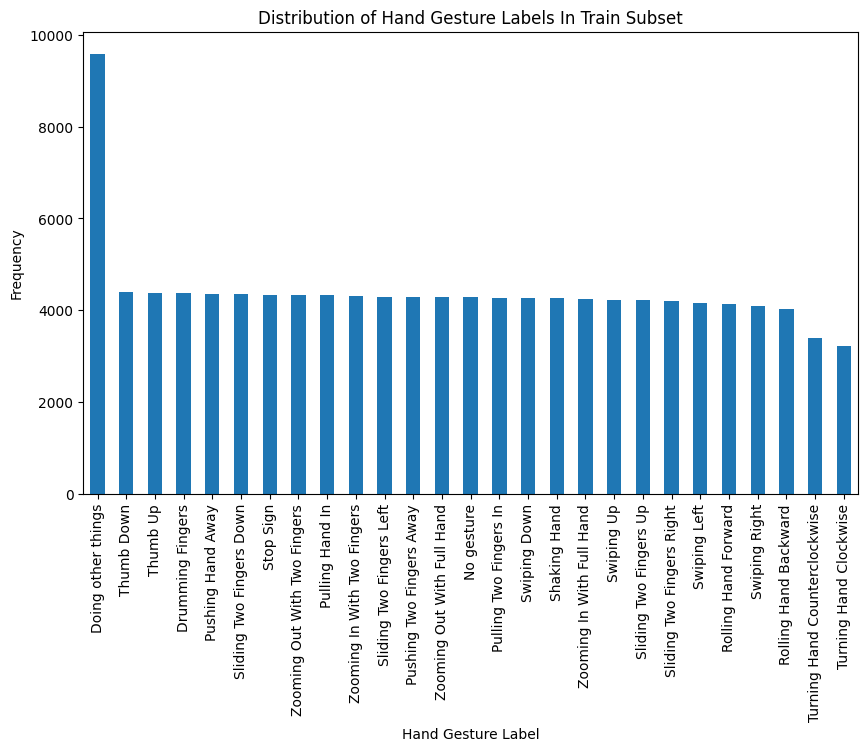

In [60]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
train_df['label'].value_counts().plot(kind='bar')
plt.xlabel('Hand Gesture Label')
plt.ylabel('Frequency')
_ = plt.title('Distribution of Hand Gesture Labels In Train Subset')
plt.savefig("jester_plots/cls_dist_train.jpg")
plt.show()

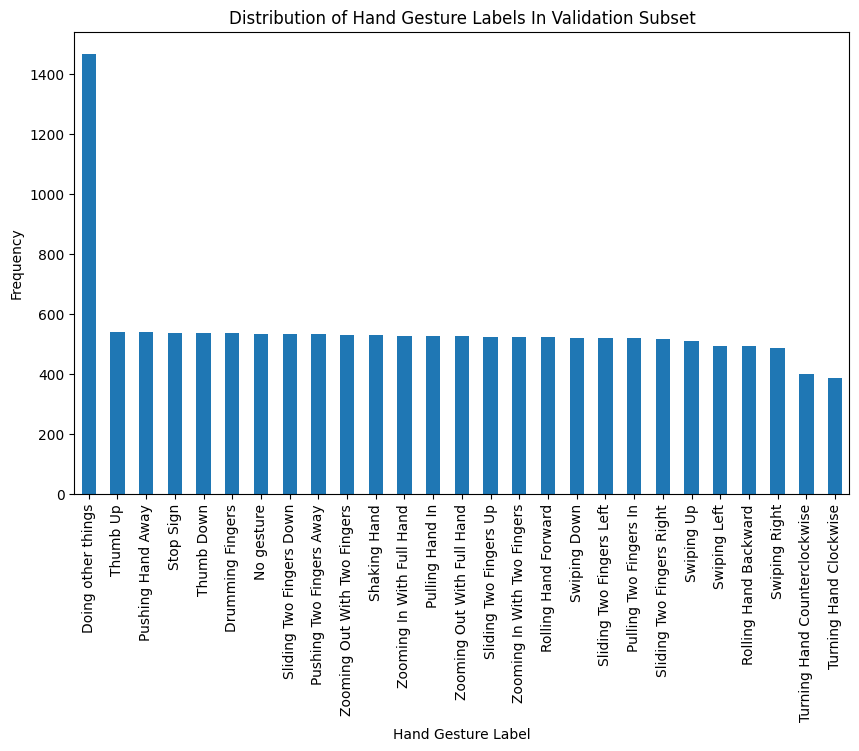

In [61]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
val_df['label'].value_counts().plot(kind='bar')
plt.xlabel('Hand Gesture Label')
plt.ylabel('Frequency')
_ = plt.title('Distribution of Hand Gesture Labels In Validation Subset')
plt.savefig("jester_plots/cls_dist_validation.jpg")
plt.show()

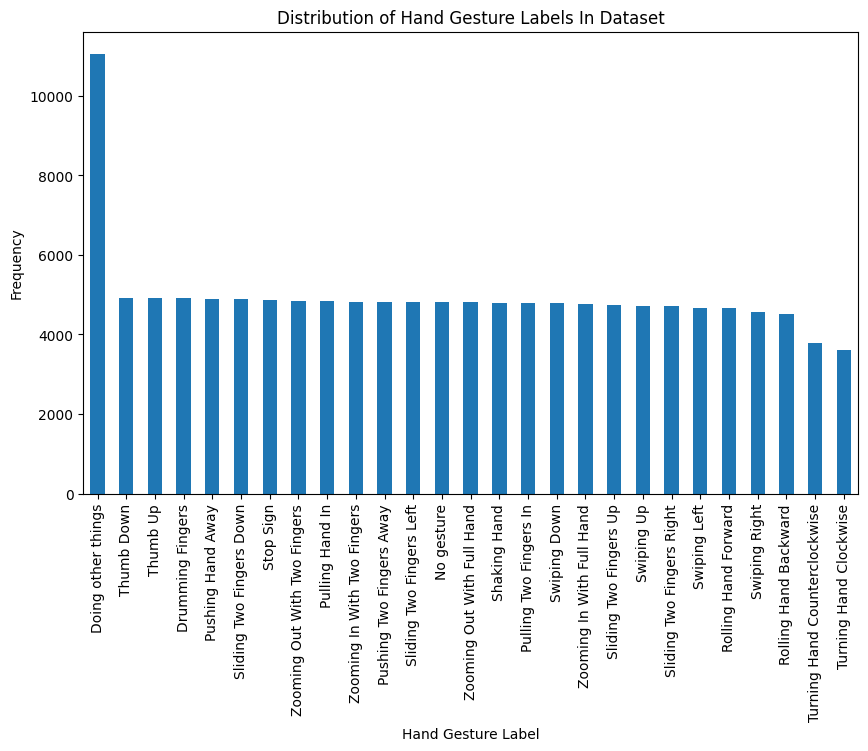

In [62]:
all_df = pd.concat([train_df, val_df])
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
all_df['label'].value_counts().plot(kind='bar')
plt.xlabel('Hand Gesture Label')
plt.ylabel('Frequency')
_ = plt.title('Distribution of Hand Gesture Labels In Dataset')
plt.savefig("jester_plots/cls_dist_all.jpg")
plt.show()

#### Dataset Info:

In [63]:
print(f"Mean Sequence Length In Train Dataset: {train_df['seq_len'].mean()}")
print(f"Mean Sequence Length In Validation Dataset: {val_df['seq_len'].mean()}")

Mean Sequence Length In Train Dataset: 35.58602250299421
Mean Sequence Length In Validation Dataset: 36.01663623453033


## Show Videos:

In [ ]:
import cv2
import os
import numpy as np
import mediapipe as mp

mp_holistic = mp.solutions.holistic
mp_drawing = mp.solutions.drawing_utils
holistic = mp_holistic.Holistic(min_tracking_confidence=0.5, min_detection_confidence=0.5)

def draw_landmarks(frame, results):
    if results.pose_landmarks:
        mp_drawing.draw_landmarks(frame, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS)
    if results.face_landmarks:
        mp_drawing.draw_landmarks(frame, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS)
    if results.left_hand_landmarks:
        mp_drawing.draw_landmarks(frame, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
    if results.right_hand_landmarks:
        mp_drawing.draw_landmarks(frame, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)

def extract_landmarks(results):
    pose_landmarks = np.array([[res.x, res.y, res.z] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33 * 3)
    face_landmarks = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468 * 3)
    left_hand_landmarks = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21 * 3)
    right_hand_landmarks = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21 * 3)
    
    return np.concatenate([pose_landmarks, face_landmarks, left_hand_landmarks, right_hand_landmarks])

break_all = False
for idx, row in train_df.iterrows():
    print(row["path"])
    images = sorted([os.path.join(row["path"], img) for img in os.listdir(row["path"]) if img.endswith(".jpg")])
    print(images)
    for image_path in images:
        frame = cv2.imread(image_path)
        frame = cv2.resize(frame, (1760, 1000))
        if frame is None:
            print(f"Error during loading image {image_path}")
            continue

        rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        
        results = holistic.process(rgb_frame)
        draw_landmarks(frame, results)

        cv2.imshow("Image", frame)
        
        if cv2.waitKey(120) & 0xFF == ord('q'):
            break_all = True
            break

    print("Press any key to continue to the next set of images or 'q' to quit.")
    if cv2.waitKey(0) & 0xFF == ord('q'):
        break_all = True

    cv2.destroyAllWindows()
    if break_all:
        break

holistic.close()
cv2.destroyAllWindows()
